<a href="https://colab.research.google.com/github/JyotsnaPatil27/Jyo_code/blob/master/REMOTE%40OSU/SolarWind.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob, pickle, json, os
import csv

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.DataFrame(pd.read_csv("/content/drive/MyDrive/SENSITIVITY3/TOA_1713_1.csv"))
df1 = pd.DataFrame(pd.read_csv("/content/drive/MyDrive/SENSITIVITY3/TOA_2124_1.csv"))
df2 = pd.DataFrame(pd.read_csv("/content/drive/MyDrive/SENSITIVITY3/TOA_2145_1.csv"))
df3 = pd.DataFrame(pd.read_csv("/content/drive/MyDrive/SENSITIVITY3/TOA_NG_1713_1.csv"))
df4 = pd.DataFrame(pd.read_csv("/content/drive/MyDrive/SENSITIVITY3/TOA_NG_2124_1.csv"))
df5 = pd.DataFrame(pd.read_csv("/content/drive/MyDrive/SENSITIVITY3/TOA_NG_2145_1.csv"))
df6 = pd.DataFrame(pd.read_csv("/content/drive/MyDrive/SENSITIVITY3/TOA_NG_AO_1713_1.csv"))
df7 = pd.DataFrame(pd.read_csv("/content/drive/MyDrive/SENSITIVITY3/TOA_NG_GBT_1713_1.csv"))

In [ ]:
df8 = pd.DataFrame(pd.read_csv("/content/drive/MyDrive/SENSITIVITY3/Freq_PPTA_new.csv"))
df9 = pd.DataFrame(pd.read_csv("/content/drive/MyDrive/SENSITIVITY3/Freq_NG_new.csv"))

In [ ]:
toa_1713 = list(df["TOA_1713"])
toa_err_1713 = list(df["TOA_ERR_1713"])
toa_2124 = list(df1["TOA_2124"])
toa_err_2124 = list(df1["TOA_ERR_2124"])
toa_2145 = list(df2["TOA_2145"])
toa_err_2145 = list(df2["TOA_ERR_2145"])

In [ ]:
toa_ng_1713 = list(df3["TOA_ng_1713"])
toa_err_ng_1713 = list(df3["TOA_ERR_ng_1713"])
toa_ng_2124 = list(df4["TOA_ng_2124"])
toa_err_ng_2124 = list(df4["TOA_ERR_ng_2124"])
toa_ng_2145 = list(df5["TOA_ng_2145"])
toa_err_ng_2145 = list(df5["TOA_ERR_ng_2145"])

In [ ]:
toa_ng_1713_1, indices_1713 = np.unique(toa_ng_1713, return_index=True)
toa_err_ng_1713_1 = np.take(toa_err_ng_1713, indices_1713)
toa_ng_2124_1, indices_2124 = np.unique(toa_ng_2124, return_index=True)
toa_err_ng_2124_1 = np.take(toa_err_ng_2124, indices_2124)
toa_ng_2145_1, indices_2145 = np.unique(toa_ng_2145, return_index=True)
toa_err_ng_2145_1 = np.take(toa_err_ng_2145, indices_2145)

In [ ]:
len(toa_ng_1713_1), len(toa_ng_1713), len(toa_ng_2124), len(toa_ng_2145)

(7408, 59389, 4982, 18675)

In [ ]:
toa_1713_1 = list(df["MJD_1713"])
toa_2124_1 = list(df1["MJD_2124"])
toa_2145_1 = list(df2["MJD_2145"])

In [ ]:
toa_ng_1713_2 = list(df3["MJD_ng_1713"])
toa_ng_2124_2 = list(df4["MJD_ng_2124"])
toa_ng_2145_2 = list(df5["MJD_ng_2145"])
toa_ng_1713_3 = np.take(toa_ng_1713_2, indices_1713)
toa_ng_2145_3 = np.take(toa_ng_2145_2, indices_2145)

In [ ]:
len(toa_1713_1), len(toa_2124_1), len(toa_2145_1), len(toa_ng_1713_3), len(toa_ng_2124_2), len(toa_ng_2145_3)

(5141, 3411, 4944, 7408, 4982, 5662)

In [ ]:
freq_1713 = list(df8["freq_1713"])
freq_1713_1 = [x for x in freq_1713 if str(x) != 'nan']
freq_2145 = list(df8["freq_2145"])
freq_2145_1 = [x for x in freq_2145 if str(x) != 'nan']
freq_2124 = list(df8["freq_2124"])
freq_2124_1 = [x for x in freq_2124 if str(x) != 'nan']

In [ ]:
freq_ng_1713 = list(df9["freq_ng_1713"])
freq_ng_1713_1 = [x for x in freq_ng_1713 if str(x) != 'nan']
freq_ng_2124 = list(df9["freq_ng_2124"])
freq_ng_2124_1 = [x for x in freq_ng_2124 if str(x) != 'nan']
freq_ng_2145 = list(df9["freq_ng_2145"])
freq_ng_2145_1 = [x for x in freq_ng_2145 if str(x) != 'nan']

In [ ]:
len(toa_1713), len(toa_2124), len(toa_2145), len(toa_ng_1713_1), len(toa_ng_1713), len(toa_ng_2124_1), len(toa_ng_2145_1)

(5141, 3411, 4944, 7408, 59389, 582, 5662)

In [ ]:
len(freq_1713_1), len(freq_2124_1), len(freq_2145_1), len(freq_ng_1713_1), len(freq_ng_2124_1), len(freq_ng_2145_1)

(4944, 4944, 4944, 4982, 4982, 4982)

In [ ]:
def SolarWind_delay(NE_SW,freq):
  delay = (4.15*10**3*NE_SW)/(freq**2)   #unit-second
  return delay

In [ ]:
NE_SW_1713 = 5.0206514446838589999
NE_SW_2124 = 5.744822249890441
NE_SW_2145 = 6.0118246308458179999

In [ ]:
NE_SW = NE_SW_1713
delay_ppta_1713 =[]
for freq in freq_1713_1:
   f1713 = SolarWind_delay(NE_SW_1713,freq)
   delay_ppta_1713.append(f1713)
NE_SW = NE_SW_2124
delay_ppta_2124 =[]
for freq1 in freq_2124_1:
   f2124 = SolarWind_delay(NE_SW_2124,freq1)
   delay_ppta_2124.append(f2124)
NE_SW = NE_SW_2145
delay_ppta_2145 =[]
for freq2 in freq_2145_1:
   f2145 = SolarWind_delay(NE_SW_2145,freq2)
   delay_ppta_2145.append(f2145)

In [ ]:
NE_SW = NE_SW_1713
delay_ng_1713 =[]
for freq4 in freq_ng_1713_1:
   f_ng1713 = SolarWind_delay(NE_SW_1713,freq4)
   delay_ng_1713.append(f_ng1713)
NE_SW = NE_SW_2124
delay_ng_2124 =[]
for freq5 in freq_ng_2124_1:
   f_ng2124 = SolarWind_delay(NE_SW_2124,freq5)
   delay_ng_2124.append(f_ng2124)
NE_SW = NE_SW_2145
delay_ng_2145 =[]
for freq6 in freq_ng_2145_1:
   f_ng2145 = SolarWind_delay(NE_SW_2145,freq6)
   delay_ng_2145.append(f_ng2145)

In [ ]:
len(delay_ppta_1713), len(delay_ppta_2124), len(delay_ppta_2145), len(delay_ng_1713), len(delay_ng_2124), len(delay_ng_2145)

(4944, 4944, 4944, 4982, 4982, 4982)

In [ ]:
def SolarElectronDensity(delay,freq):
  NE_SW = (delay*freq**2)/(4.15*10**3)   #unit-second
  return NE_SW

In [ ]:
NE_SW_1713_1 = []
delay_1713 = np.median(np.array(delay_ppta_1713))
for freq in freq_1713_1:
  q1713 = SolarElectronDensity(delay_1713,freq)
  NE_SW_1713_1.append(q1713)
NE_SW_2124_1 = []
delay_2124 = np.median(np.array(delay_ppta_2124))
for freq1 in freq_2124_1:
  q2124 = SolarElectronDensity(delay_2124,freq1)
  NE_SW_2124_1.append(q2124)
NE_SW_2145_1 = []
delay_2145 = np.median(np.array(delay_ppta_2145))
for freq2 in freq_2145_1:
  q2145 = SolarElectronDensity(delay_2145,freq2)
  NE_SW_2145_1.append(q2145)


In [ ]:
NE_SW_ng_1713 = []
delay_ng_1713 = np.median(np.array(delay_ng_1713))
for freq in freq_ng_1713_1:
  qng1713 = SolarElectronDensity(delay_ng_1713,freq)
  NE_SW_ng_1713.append(qng1713)
NE_SW_ng_2124 = []
delay_ng_2124 = np.median(np.array(delay_ng_2124))
for freq1 in freq_ng_2124_1:
  qng2124 = SolarElectronDensity(delay_ng_2124,freq1)
  NE_SW_ng_2124.append(qng2124)
NE_SW_ng_2145 = []
delay_ng_2145 = np.median(np.array(delay_ng_2145))
for freq2 in freq_ng_2145_1:
  qng2145 = SolarElectronDensity(delay_ng_2145,freq2)
  NE_SW_ng_2145.append(qng2145)


In [ ]:
len(NE_SW_1713_1), len(NE_SW_2124_1), len(NE_SW_2145_1), len(NE_SW_ng_1713), len(NE_SW_ng_2124), len(NE_SW_ng_2145)

(4944, 4944, 4944, 4982, 4982, 4982)

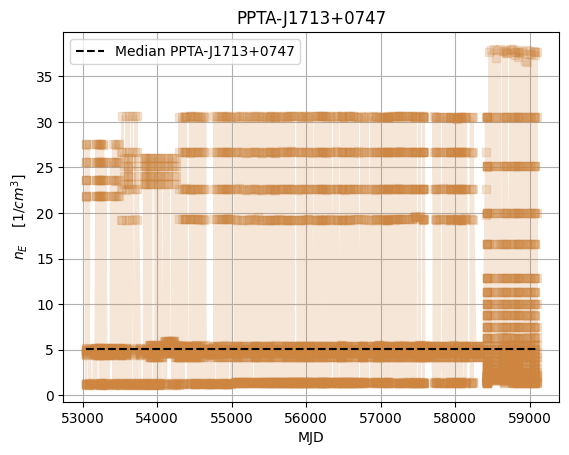

In [ ]:
plt.plot((toa_1713_1[:4944]), NE_SW_1713_1, color='peru', marker = 's', alpha = 0.20)
plt.hlines(np.median(np.array(NE_SW_1713_1)), min(toa_1713_1[:4944]), max(toa_1713_1[:4944]),color='black', linestyle = '--', label='Median PPTA-J1713+0747')
plt.xlabel('MJD')
plt.ylabel('$n_E$    $[1/cm^3]$')
plt.title('PPTA-J1713+0747')
plt.grid()
plt.legend()
plt.show()

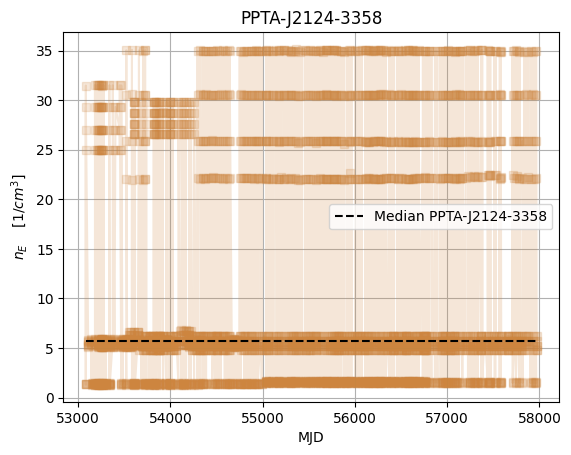

In [ ]:
plt.plot((toa_2124_1), NE_SW_2124_1[:3411], color='peru', marker = 's', alpha = 0.20)
plt.hlines(np.median(np.array(NE_SW_2124_1)), min(toa_2124_1), max(toa_2124_1),color='black', linestyle = '--', label='Median PPTA-J2124-3358')
plt.xlabel('MJD')
plt.ylabel('$n_E$    $[1/cm^3]$')
plt.title('PPTA-J2124-3358')
plt.grid()
plt.legend()
plt.show()

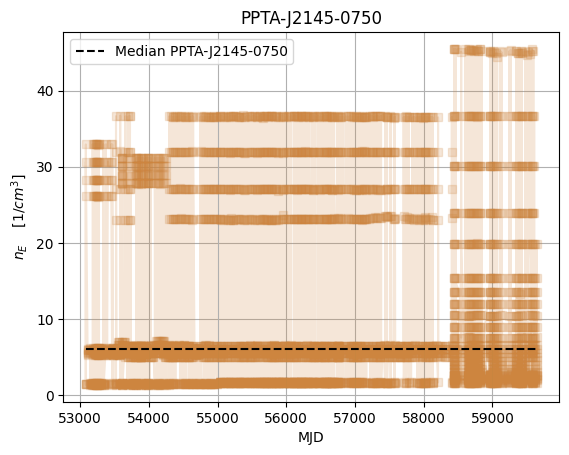

In [ ]:
plt.plot((toa_2145_1), NE_SW_2145_1, color='peru', marker = 's', alpha = 0.20)
plt.hlines(np.median(np.array(NE_SW_2145_1)), min(toa_2145_1), max(toa_2145_1),color='black', linestyle = '--', label='Median PPTA-J2145-0750')
plt.xlabel('MJD')
plt.ylabel('$n_E$    $[1/cm^3]$')
plt.title('PPTA-J2145-0750')
plt.grid()
plt.legend()
plt.show()

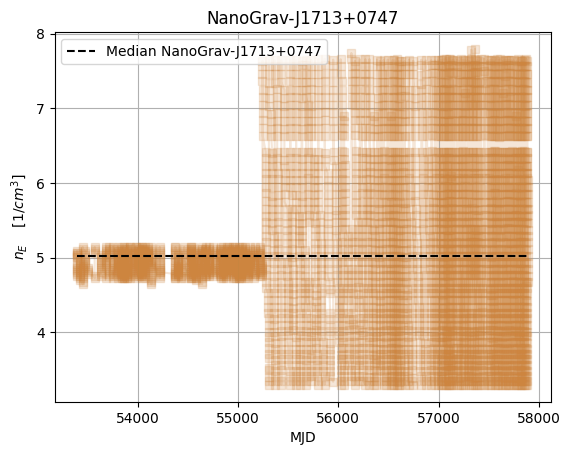

In [ ]:
plt.plot((toa_ng_1713_3[:4982]), NE_SW_ng_1713, color='peru', marker = 's', alpha = 0.20)
plt.hlines(np.median(np.array(NE_SW_ng_1713)), min(toa_ng_1713_3[:4982]), max(toa_ng_1713_3[:4982]),color='black', linestyle = '--', label='Median NanoGrav-J1713+0747')
plt.xlabel('MJD')
plt.ylabel('$n_E$    $[1/cm^3]$')
plt.title('NanoGrav-J1713+0747')
plt.grid()
plt.legend()
plt.show()

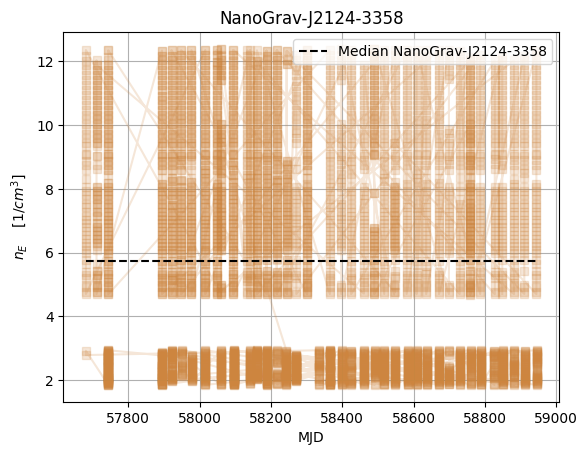

In [ ]:
plt.plot((toa_ng_2124_2), NE_SW_ng_2124, color='peru', marker = 's', alpha = 0.20)
plt.hlines(np.median(np.array(NE_SW_ng_2124)), min(toa_ng_2124_2), max(toa_ng_2124_2),color='black', linestyle = '--', label='Median NanoGrav-J2124-3358')
plt.xlabel('MJD')
plt.ylabel('$n_E$    $[1/cm^3]$')
plt.title('NanoGrav-J2124-3358')
plt.grid()
plt.legend()
plt.show()

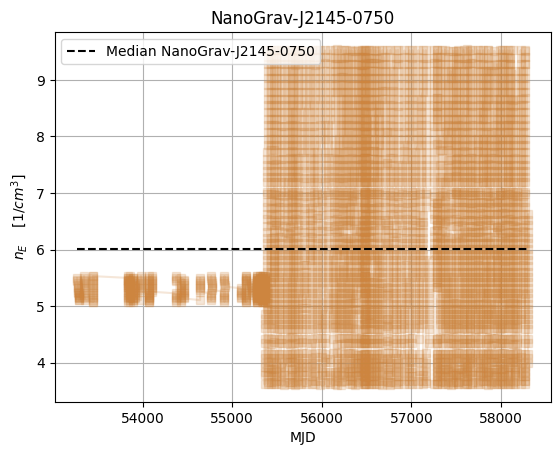

In [ ]:
plt.plot((toa_ng_2145_3[:4982]), NE_SW_ng_2145, color='peru', marker = 's', alpha = 0.20)
plt.hlines(np.median(np.array(NE_SW_ng_2145)), min(toa_ng_2145_3[:4982]), max(toa_ng_2145_3[:4982]),color='black', linestyle = '--', label='Median NanoGrav-J2145-0750')
plt.xlabel('MJD')
plt.ylabel('$n_E$    $[1/cm^3]$')
plt.title('NanoGrav-J2145-0750')
plt.grid()
plt.legend()
plt.show()

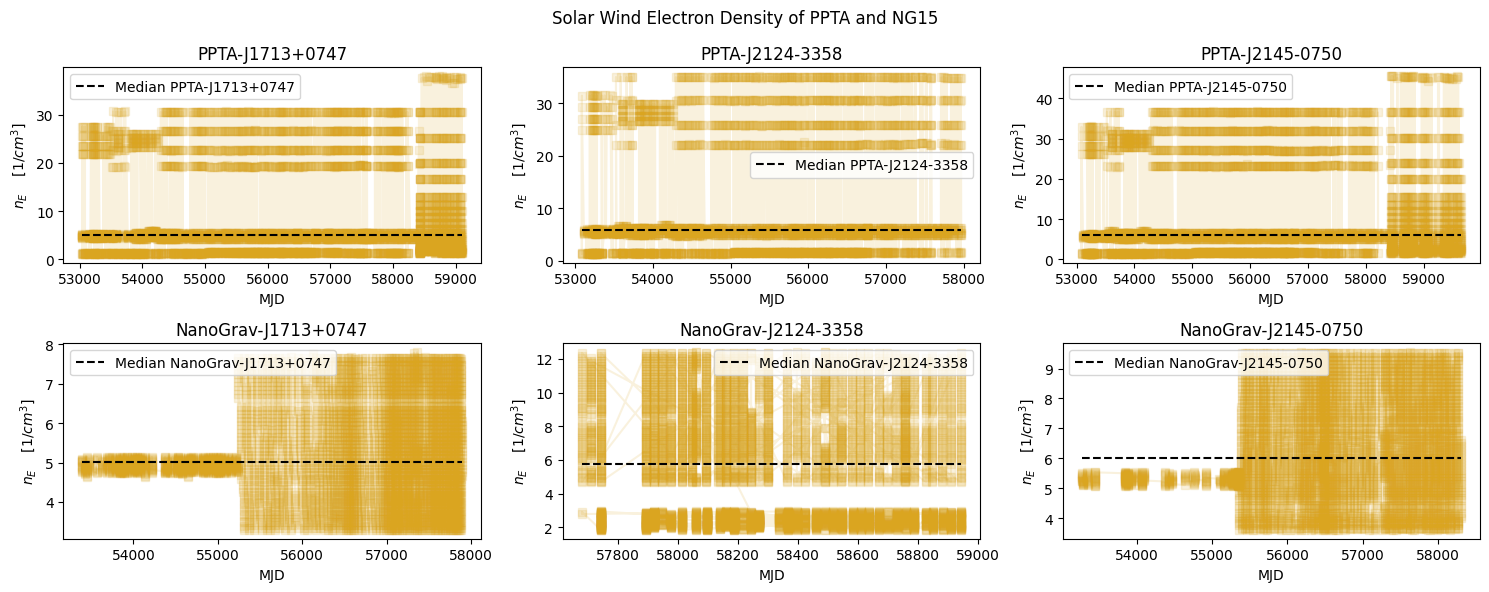

In [ ]:
fig, axs = plt.subplots(2,3, figsize=(15,6))
axs[0,0].plot((toa_1713_1[:4944]), NE_SW_1713_1, color='goldenrod', marker = 's', alpha = 0.15)
axs[0,0].hlines(np.median(np.array(NE_SW_1713_1)), min(toa_1713_1[:4944]), max(toa_1713_1[:4944]),color='black', linestyle = '--', label='Median PPTA-J1713+0747')
axs[0,0].legend()
axs[0,1].plot((toa_2124_1), NE_SW_2124_1[:3411], color='goldenrod', marker = 's', alpha = 0.15)
axs[0,1].hlines(np.median(np.array(NE_SW_2124_1)), min(toa_2124_1), max(toa_2124_1),color='black', linestyle = '--', label='Median PPTA-J2124-3358')
axs[0,1].legend()
axs[0,2].plot((toa_2145_1), NE_SW_2145_1, color='goldenrod', marker = 's', alpha = 0.15)
axs[0,2].hlines(np.median(np.array(NE_SW_2145_1)), min(toa_2145_1), max(toa_2145_1),color='black', linestyle = '--', label='Median PPTA-J2145-0750')
axs[0,2].legend()
axs[1,0].plot((toa_ng_1713_3[:4982]), NE_SW_ng_1713, color='goldenrod', marker = 's', alpha = 0.15)
axs[1,0].hlines(np.median(np.array(NE_SW_ng_1713)), min(toa_ng_1713_3[:4982]), max(toa_ng_1713_3[:4982]),color='black', linestyle = '--', label='Median NanoGrav-J1713+0747')
axs[1,0].legend()
axs[1,1].plot((toa_ng_2124_2), NE_SW_ng_2124, color='goldenrod', marker = 's', alpha = 0.15)
axs[1,1].hlines(np.median(np.array(NE_SW_ng_2124)), min(toa_ng_2124_2), max(toa_ng_2124_2),color='black', linestyle = '--', label='Median NanoGrav-J2124-3358')
axs[1,1].legend()
axs[1,2].plot((toa_ng_2145_3[:4982]), NE_SW_ng_2145, color='goldenrod', marker = 's', alpha = 0.15)
axs[1,2].hlines(np.median(np.array(NE_SW_ng_2145)), min(toa_ng_2145_3[:4982]), max(toa_ng_2145_3[:4982]),color='black', linestyle = '--', label='Median NanoGrav-J2145-0750')
axs[1,2].legend()
axs[0,0].set_title('PPTA-J1713+0747')
axs[0,1].set_title('PPTA-J2124-3358')
axs[0,2].set_title('PPTA-J2145-0750')
axs[1,0].set_title('NanoGrav-J1713+0747')
axs[1,1].set_title('NanoGrav-J2124-3358')
axs[1,2].set_title('NanoGrav-J2145-0750')

for ax in axs.flat:
    ax.set_xlabel('MJD')
    ax.set_ylabel('$n_E$    $[1/cm^3]$')

fig.suptitle('Solar Wind Electron Density of PPTA and NG15')
plt.tight_layout()
plt.show()

In [ ]:
mid1 = np.median(np.array(NE_SW_1713_1))
mid2 = np.median(np.array(NE_SW_2124_1))
mid3 = np.median(np.array(NE_SW_2145_1))
mid4 = np.median(np.array(NE_SW_ng_1713))
mid5 = np.median(np.array(NE_SW_ng_2124))
mid6 = np.median(np.array(NE_SW_ng_2145))
mid1, mid2, mid3, mid4, mid5, mid6


(5.0206514447069015,
 5.744822249890441,
 6.011824630845818,
 5.020651444706118,
 5.744822250901903,
 6.011824630845818)

In [ ]:
NE_SW_1713 = 5.0206514446838589999
NE_SW_2124 = 5.744822249890441
NE_SW_2145 = 6.0118246308458179999